In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_excel("airfrance.xlsx")

In [4]:
dataset.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher ID              4510 non-null   object 
 1   Publisher Name            4510 non-null   object 
 2   Keyword ID                4510 non-null   int64  
 3   Keyword                   4510 non-null   object 
 4   Match Type                4462 non-null   object 
 5   Campaign                  4510 non-null   object 
 6   Keyword Group             4510 non-null   object 
 7   Category                  4510 non-null   object 
 8   Bid Strategy              3286 non-null   object 
 9   Keyword Type              4510 non-null   object 
 10  Status                    4510 non-null   object 
 11  Search Engine Bid         4510 non-null   float64
 12  Clicks                    4510 non-null   int64  
 13  Click Charges             4510 non-null   float64
 14  Avg. Cos

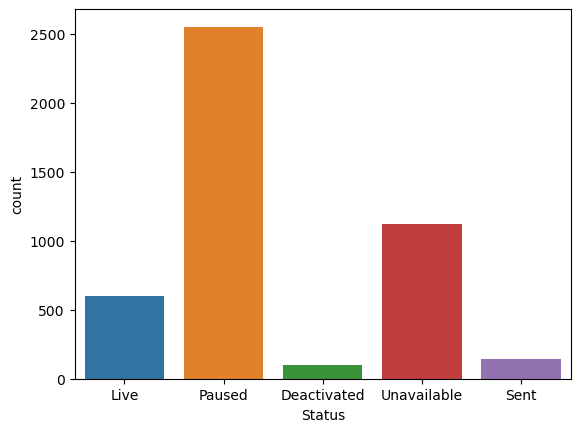

In [6]:
sns.countplot(x = 'Status', data = dataset)

plt.show()

### Additional metrics
* Net Revenue (Amount (total revenue) – Total Cost))
* Return on Ad $ Spent (ROA) (Net Revenue / Total Cost)
* Average Revenue per Booking (Amount /Total Volume of Bookings)
* Probability of Booking (Engine Click Thru % (CTR) * Trans. Conv. % (TCR) / 10000)

In [8]:
# Calculate Net Revenue
dataset['Net Revenue'] = dataset['Amount'] - dataset['Total Cost']

#Return on Ad $ Spent (ROA)
dataset.loc[dataset['Total Cost'] != 0, 'Return on Ad $ Spent (ROA)'] = (dataset['Net Revenue'] / dataset['Total Cost']) * 100
dataset.loc[dataset['Total Cost'] == 0, 'Return on Ad $ Spent (ROA)'] = 0

#Average Revenue per Booking
dataset.loc[dataset['Total Volume of Bookings'] != 0, 'Average Revenue per Booking'] = dataset['Amount'] / dataset['Total Volume of Bookings']
dataset.loc[dataset['Total Volume of Bookings'] == 0, 'Average Revenue per Booking'] = 0  

#Probability of Booking
dataset['Probability of Booking'] = dataset['Engine Click Thru %'] * dataset['Trans. Conv. %'] / 10000

dataset.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Average Revenue per Booking,Probability of Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,975.327778,0.818182
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,1574.200000,0.166667
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,100583.870968,390.150000,0.111111
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,832.575000,0.004988
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,42400.000000,935.000000,0.003145


In [9]:
# dataset['Bid Strategy Numerical'].sample(20)

In [10]:
columns = ['Engine Click Thru %', 'Trans. Conv. %', 'Net Revenue', 'Avg. Cost per Click',
                     'Return on Ad $ Spent (ROA)', 'Average Revenue per Booking', 'Probability of Booking']

dataset[columns].describe()

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,Return on Ad $ Spent (ROA),Average Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000
mean,11.141451,0.569255,866.207678,1.890240,341.413864,83.575942,0.000681
std,20.234582,13.862485,14246.298903,1.322375,7277.915278,344.981225,0.015151
min,0.000000,0.000000,-8725.924987,0.000000,-100.000000,0.000000,0.000000
25%,1.531681,0.000000,-18.871875,0.825000,-100.000000,0.000000,0.000000
50%,4.105614,0.000000,-4.987500,1.650493,-100.000000,0.000000,0.000000
75%,10.916928,0.000000,-1.600000,2.662500,-100.000000,0.000000,0.000000
max,200.000000,900.000000,549524.050273,10.000000,379487.027027,5877.750000,0.818182


## Histogram

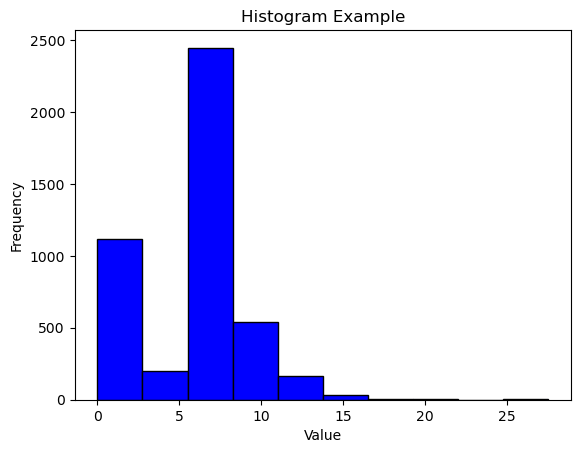

In [12]:
# Create histogram
plt.hist(dataset['Search Engine Bid'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Display histogram
plt.show()

**Potential IVs**

* Engine Click Thru % 
* Trans. Conv. %: 
* Bid Strategy:  
* Campaign:  
* Search Engine Bid: 
* Avg. Cost per Click: 
* Campaign Status: 
* Probability of Booking: 

In [14]:
dataset.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Average Revenue per Booking',
       'Probability of Booking'],
      dtype='object')

In [16]:
dataset['Bid Strategy'].nunique()

8

In [17]:
bid_strategy_mapping = {'Position 2-5 Bid Strategy': 1,'Position 1- 3': 2,'Position 1-2 Target': 3,'Position 5-10 Bid Strategy': 4,'Position 1-4 Bid Strategy': 5,'Position 1 -2 Target': 6,'Postiion 1-4 Bid Strategy': 7,'Pos 3-6': 8}
dataset['Bid Strategy Numerical'] = dataset['Bid Strategy'].map(bid_strategy_mapping)


dataset['Bid Strategy Numerical'] = dataset['Bid Strategy Numerical'].fillna(0)

In [18]:
match_type_mapping = {'Advanced': 1,'Broad': 2,'Exact': 3,'Standard': 4,}
dataset['Match Type Numerical'] = dataset['Match Type'].map(match_type_mapping)

In [19]:
publisher_mapping = {'Yahoo - US': 1,'MSN - Global': 2,'Google - Global': 3,'Overture - Global': 4,'Google - US': 5,'Overture - US': 6,'MSN - US': 7}
dataset['Publisher Name Numerical'] = dataset['Publisher Name'].map(publisher_mapping)

In [20]:
dataset.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Average Revenue per Booking,Probability of Booking,Bid Strategy Numerical,Match Type Numerical,Publisher Name Numerical
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,8777.95,2.3125,9,8775.6375,379487.027027,975.327778,0.818182,0.0,1.0,1
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,1574.20,0.6250,1,1573.5750,251772.000000,1574.200000,0.166667,0.0,1.0,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,390.15,0.3875,1,389.7625,100583.870968,390.150000,0.111111,1.0,2.0,2
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,1665.15,2.3125,2,1662.8375,71906.491546,832.575000,0.004988,2.0,3.0,3
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,935.00,2.2000,1,932.8000,42400.000000,935.000000,0.003145,3.0,4.0,4


In [21]:
columns_of_interest = ['Total Cost', 'Engine Click Thru %', 'Trans. Conv. %', 'Avg. Cost per Click', 'Return on Ad $ Spent (ROA)', 'Average Revenue per Booking', 'Probability of Booking','Clicks', 'Click Charges', 'Search Engine Bid','Bid Strategy Numerical','Match Type Numerical','Publisher Name Numerical']

# Calculate pairwise correlations
correlation_matrix = dataset[columns_of_interest].corr()

# Display the correlation matrix
correlation_matrix

,Total Cost,Engine Click Thru %,Trans. Conv. %,Avg. Cost per Click,Return on Ad $ Spent (ROA),Average Revenue per Booking,Probability of Booking,Clicks,Click Charges,Search Engine Bid,Bid Strategy Numerical,Match Type Numerical,Publisher Name Numerical
Total Cost,1.000000,-0.027310,-0.000401,0.029171,0.003013,0.293301,-0.000769,0.868330,1.000000,0.113212,0.037252,0.009448,0.020699
Engine Click Thru %,-0.027310,1.000000,0.001666,0.106898,0.000861,-0.042343,0.028059,-0.014000,-0.027310,0.147721,-0.002855,-0.144747,-0.078877
Trans. Conv. %,-0.000401,0.001666,1.000000,0.003308,0.856458,0.096467,0.889333,0.001533,-0.000401,0.002874,-0.020830,-0.021396,-0.033216
Avg. Cost per Click,0.029171,0.106898,0.003308,1.000000,-0.033836,-0.046970,0.004340,-0.033787,0.029171,0.280368,0.101993,-0.245798,-0.059102
Return on Ad $ Spent (ROA),0.003013,0.000861,0.856458,-0.033836,1.000000,0.195718,0.772060,0.015593,0.003013,-0.005297,-0.030848,-0.015313,-0.043808
Average Revenue per Booking,0.293301,-0.042343,0.096467,-0.046970,0.195718,1.000000,0.095137,0.283024,0.293301,-0.009960,0.031148,-0.016178,-0.032472
Probability of Booking,-0.000769,0.028059,0.889333,0.004340,0.772060,0.095137,1.000000,0.002635,-0.000769,0.008993,-0.011160,-0.021122,-0.023437
Clicks,0.868330,-0.014000,0.001533,-0.033787,0.015593,0.283024,0.002635,1.000000,0.868330,0.114934,0.002625,0.014216,0.012343
Click Charges,1.000000,-0.027310,-0.000401,0.029171,0.003013,0.293301,-0.000769,0.868330,1.000000,0.113212,0.037252,0.009448,0.020699
Search Engine Bid,0.113212,0.147721,0.002874,0.280368,-0.005297,-0.009960,0.008993,0.114934,0.113212,1.000000,-0.093704,-0.060100,-0.179378


**Factors to consider in our regression analysis**

* Average revenue per booking
* clicks
* search engine bids
* bid strategy


In [23]:
x=dataset[['Total Cost', 'Engine Click Thru %', 'Trans. Conv. %', 'Avg. Cost per Click', 'Return on Ad $ Spent (ROA)', 'Probability of Booking','Clicks', 'Click Charges', 'Search Engine Bid']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() #create an empty dataframe called vif
x.info()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])] #for each index in the dataframe (each IV), calculate VIF
vif['Variables'] = x.columns #create the corresponding variable column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Cost                  4510 non-null   float64
 1   Engine Click Thru %         4510 non-null   float64
 2   Trans. Conv. %              4510 non-null   float64
 3   Avg. Cost per Click         4510 non-null   float64
 4   Return on Ad $ Spent (ROA)  4510 non-null   float64
 5   Probability of Booking      4510 non-null   float64
 6   Clicks                      4510 non-null   int64  
 7   Click Charges               4510 non-null   float64
 8   Search Engine Bid           4510 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 317.2 KB


C:\Users\Rafique\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [24]:
vif

,VIF,Variables
0,inf,Total Cost
1,1.330624,Engine Click Thru %
2,7.303623,Trans. Conv. %
3,2.695594,Avg. Cost per Click
4,3.782132,Return on Ad $ Spent (ROA)
5,4.817725,Probability of Booking
6,4.195515,Clicks
7,inf,Click Charges
8,2.814464,Search Engine Bid


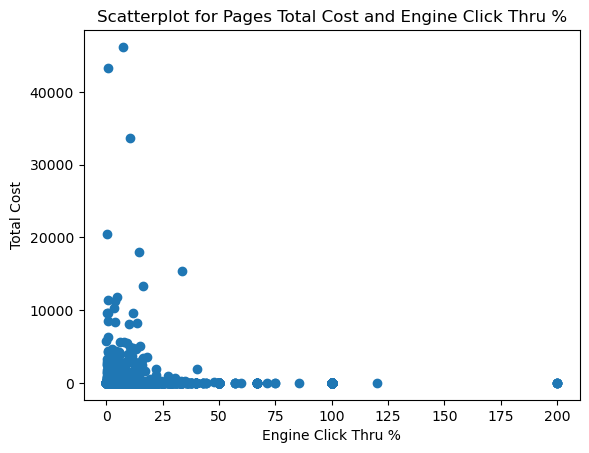

In [25]:
plt.scatter(dataset['Engine Click Thru %'], dataset['Total Cost'])

plt.title('Scatterplot for Pages Total Cost and Engine Click Thru %')
plt.xlabel('Engine Click Thru %')
plt.ylabel('Total Cost')
plt.show()

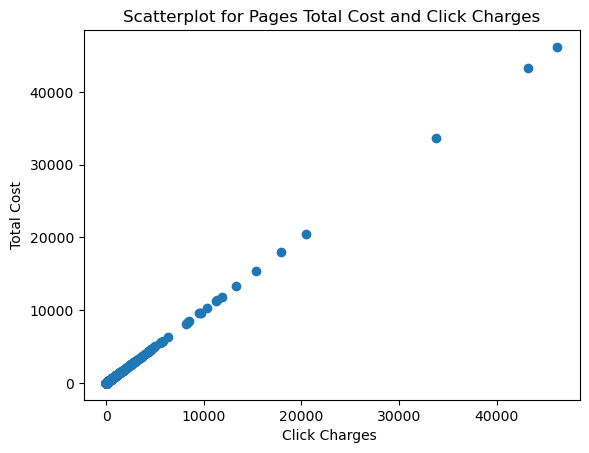

In [26]:
plt.scatter(dataset['Click Charges'], dataset['Total Cost'])

plt.title('Scatterplot for Pages Total Cost and Click Charges')
plt.xlabel('Click Charges ')
plt.ylabel('Total Cost')
plt.show()

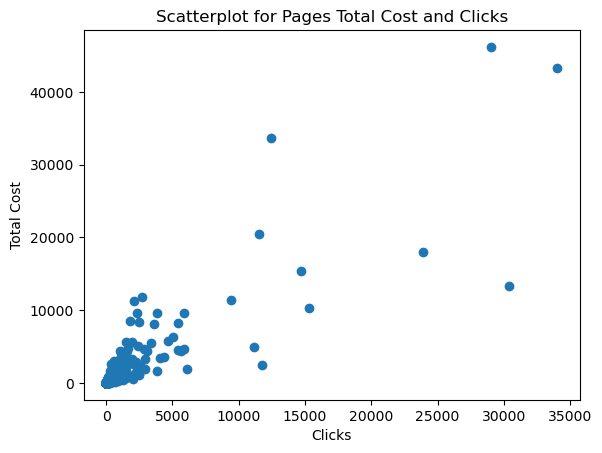

In [27]:
plt.scatter(dataset['Clicks'], dataset['Total Cost'])

plt.title('Scatterplot for Pages Total Cost and Clicks')
plt.xlabel('Clicks')
plt.ylabel('Total Cost')
plt.show()

In [28]:
dataset.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Average Revenue per Booking',
       'Probability of Booking', 'Bid Strategy Numerical',
       'Match Type Numerical', 'Publisher Name Numerical'],
      dtype='object')

### Implementation of Model

In [30]:
import statsmodels.api as sm

In [31]:
# dataset.info

In [32]:
mod = sm.OLS(dataset['Total Cost'], dataset[['Average Revenue per Booking', 'Clicks', 'Search Engine Bid','Bid Strategy Numerical']])

In [33]:
res=mod.fit()

In [34]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:             Total Cost   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              3589.
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        10:39:41   Log-Likelihood:                         -35687.
No. Observations:                4510   AIC:                                  7.138e+04
Df Residuals:                    4506   BIC:                                  7.141e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [35]:
indepvar=sm.add_constant(dataset[['Average Revenue per Booking', 'Clicks', 'Search Engine Bid','Bid Strategy Numerical']])

In [36]:
mod=sm.OLS(dataset['Total Cost'],indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     3526.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        10:39:41   Log-Likelihood:                -35682.
No. Observations:                4510   AIC:                         7.137e+04
Df Residuals:                    4505   BIC:                         7.141e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Bonus questions

* ### Question 1

In [181]:
count = dataset.groupby('Publisher Name')['Publisher ID'].count()
print(count)
probability_of_booking = dataset.groupby('Publisher Name')['Return on Ad $ Spent (ROA)'].sum()
print(probability_of_booking)

184333.771453/669

Publisher Name
Google - Global       393
Google - US          2071
MSN - Global           99
MSN - US               98
Overture - Global     553
Overture - US         661
Yahoo - US            635
Name: Publisher ID, dtype: int64
Publisher Name
Google - Global      184333.771453
Google - US          253043.395083
MSN - Global         105426.939183
MSN - US              11572.559630
Overture - Global    248001.653633
Overture - US         80387.926970
Yahoo - US           657010.278741
Name: Return on Ad $ Spent (ROA), dtype: float64


275.53628019880415

In [173]:
# net revenue
sum_net_revenue = dataset.groupby('Publisher Name')['Net Revenue'].sum()
# average cost per click
avg_cost_per_click = dataset.groupby('Publisher Name')['Avg. Cost per Click'].mean()
#total volume of bookings
total_volume_of_bookings = dataset.groupby('Publisher Name')['Total Volume of Bookings'].sum()
#average revenue per booking
average_revenue_per_booking = dataset.groupby('Publisher Name')['Amount'].mean()
#ROA (Return on Ad $ Spent)
roa = dataset.groupby('Publisher Name')['Return on Ad $ Spent (ROA)'].mean()
#probability of booking
count = dataset.groupby('Publisher Name')['Publisher ID'].count()
probability_of_booking = dataset.groupby('Publisher Name')['Probability of Booking'].sum()/count
#sum of click charges
sum_click_charges = dataset.groupby('Publisher Name')['Click Charges'].sum()
#cost per booking
Cost=dataset.groupby('Publisher Name')['Total Cost'].sum()
Bookings = dataset.groupby('Publisher Name')['Total Volume of Bookings'].sum()
cost_per_booking = Cost / Bookings
results = pd.DataFrame({
    'Sum of Net Revenue': sum_net_revenue,
    'Average Cost per Click': avg_cost_per_click,
    'Total Volume of Bookings': total_volume_of_bookings,
    'Average Revenue per Booking': average_revenue_per_booking,
    'ROA': roa,
    'Probability of Booking': probability_of_booking,
    'Sum of Click Charges': sum_click_charges,
    'Cost per Booking': cost_per_booking
})

# Display the results
results
# results.to_excel('report.xlsx', index=True)

,Sum of Net Revenue,Average Cost per Click,Total Volume of Bookings,Average Revenue per Booking,ROA,Probability of Booking,Sum of Click Charges,Cost per Booking
Publisher Name,,,,,,,,
Google - Global,8.086031e+05,2.224959,797,2365.266667,34.072786,0.000456,120946.711971,151.752462
Google - US,1.391841e+06,2.383942,1550,842.820763,46.773271,0.000757,353640.598920,228.155225
MSN - Global,1.333639e+05,2.152998,129,1469.941919,19.487419,0.001255,12160.362438,94.266375
MSN - US,1.654513e+05,2.867470,140,1852.548980,2.139105,0.000546,16098.487407,114.989196
Overture - Global,3.657888e+05,0.804759,372,777.730018,45.841341,0.000086,64295.862144,172.838339
Overture - US,2.054572e+05,0.763921,289,525.617625,14.859136,0.000065,141976.074456,491.266694
Yahoo - US,8.360911e+05,1.998876,662,1389.431417,121.443674,0.001661,46197.824620,69.785234


* ### Quetion 2

#### Engine Click-through Rate (TCR) 

$TCR = (\frac{\text{Total Bookings}}{\text{Clicks}}) \times 100$


* Total Bookings = 208
* Clicks=2839

TCR = (208/2839)*100 = 98.63%

#### CPC (Cost Per Click):
$CPC=\frac{\text{Media Cost}}{\text{Clicks}}$

* Media Cost = $3,567.13
* Clicks=2839 

CPC= (3567.13/2839)= 1.2564

 #### Average Publisher CPC:

Average Publisher CPC is computed as the media cost divided by the number of impressions. There is not enough data for us to compute this.